# Laboratorio 5: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>


### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Rafael Tapia
- Nombre de alumno 2: Daniel Vargas

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/rodusflitope/DataScienceLabs)

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.





### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

1. La diferencia entre los datos de entrenamiento y validación es que el primero se usa para entrenar los modelos mientras el segundo se utiliza para seleccionar el mejor modelo al ir variando sus hiperparámetros.

2. El principal desafío al trabajar problemas de clasificación con data no supervisada es que no existen etiquetas en los datos, lo cual dificulta el poder determinar la calidad de las predicciones sobre ellos.

3. La matriz de confusión es una métrica de desempeño que permite determinar la capacidad predictiva de un modelo contrastando los valores predichos versus los reales.  

4.
  * Accuracy:
$$
 \frac{TP + TN}{TP + TN + FP + FN}
$$

  Mide qué tan buenas son las predicciones (TP y TN) sobre el total de datos. Se puede interpretar como el nivel global de acierto del modelo.

  * Precision:
  $$
\text{P} = \frac{TP}{TP + FP}
$$

Mide cuántos casos, de los que fueron clasificados como positivos, son realmente positivos.

  * Recall:
  $$
\text{R} = \frac{TP}{TP + FN}
$$
Mide cuántos casos, de los que son realmente positivos, fueron clasificados correctamente como positivos.  
  * F1 score:
$$
F1 = 2 \cdot \frac{\text{P} \cdot \text{R}}{\text{P} + \text{R}}
$$

Se puede interpretar como una media harmonica entre precision y recall. Castiga si ambas métricas son muy diferentes.

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación.

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.

  Dado el porcentaje de máquinas que eventualmente pueden fallar, es de interés clasificar correctamente las máquinas que tienen Fallas (clase "+").
  Clasificar una maquina en buenas condiciones como si tuviera una Falla (FP) no representa ningún riesgo a nivel operativo, por lo que se desea minimizar el error de clasificar una máquina que tenga fallas como si estuviera en buenas condiciones (FN). En este sentido es recomendable utilizar Recall. Sin embargo, muchos Falsos positivos puede hacer que se le haga mantenimiento innecesario a máquinas que no lo necesitaban, por lo que se puede complementar la metrica mencionada con F1 score para balancear recall y precision.  


  * Detección de enfermedades altamente contagiosas.

En este contexto es trascendental detectar enfermedades altamente contagiosas con la mayor precisión posible. Al ser la clase positiva "enfermedad contagiosa", se busca reducir la tasa de enfermedades que fueron clasificadas como "no contagiosas" cuando en realidad si lo eran, es decir, minimizar la tasa de falsos negativos. Para esto es altamente recomendable utilizar el Recall.


  * Aprobación de créditos de alto riesgo.

En este contexto, clasificar erróneamente un credito de alto riesgo como uno que no lo es, no necesariamente representa una amenaza para la entidad, pues bajo medidas de protección financiera adecuadas, este credito riesgoso puede traer consigo un alto retorno. Si la clase positiva es crédito riesgoso, un Falso Negativo no es inadmisible, por lo que el interés se centra en reducir la tasa de créditos que son clasificados como riesgosos cuando en realidad no lo son (FP), pues una cartera suficientemente fuerte a nivel financiero puede tratar con altos riesgos, incluso si estos fueron clasificados como "no riesgosos". Se recomendaría entonces usar la métrica de Precision.

  * Detección de crímenes.

En este contexto es importante detectar crímenes (clase +) correctamente evitando clasificarlos erroneamente como si no lo fueran, es decir, minimizar la tasa de Falsos Negativos. Por otra parte, condenar a alguien por cometer un acto considerado como crimen cuando en realidad no lo era, sería injusto, asi que también interesa evitar falsos positivos. Combinando ambos enfoques, se recomendaría utilizar F1 score para balancear tanto precision como recall.  



6. La calibración de modelos es un proceso que permite interpretar las probabilidades estimadas como frecuencias a largo plazo. La calibración se utiliza cuando se requiere que las probabilidades sean confiables e interpretables en la toma de decisiones de los modelos y para modular los scores.



# Parte práctica [48 puntos]

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/drive/My Drive/Colab Notebooks/Lab de Programación - Primavera 2025/Lab5/stats_players.csv'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [3]:
# df.isna().sum()

In [4]:
import pandas as pd
df = pd.read_csv('D:\Academico\Master Data Science\Semestre II - Primavera\Laboratorio de programación\Lab5\stats_players.csv')


In [5]:
df.head()


,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11


In [6]:
print(df.shape)

(17588, 39)


**1.1.1 Generación variable binaria "Label"**

In [7]:
# Creación de variable binaria "label", que vale 1 si el jugador es seleccionado y 0 si no es seleccionado para representar a su país.
df["label"] = df["National_Position"].notna().astype(int)

In [8]:
df["label"].value_counts()

label
0    16513
1     1075
Name: count, dtype: int64

In [9]:
pct = df["label"].value_counts()/df["label"].value_counts().sum().round(3)
pct.round(3)*100

label
0    93.9
1     6.1
Name: count, dtype: float64

**1.1.2. Rta/**
Se observa que hay 16.513 jugadores que no fueron seleccionados para representar a su país lo cual corresponde al 93.9% del total. Este desbalance de clases debe considerarse al momento de evaluar métricas como accuracy, precision, recall, etc.

**1.1.3 Rta/** Antes de hacer algún preprocesamiento, se observa que hay variables categóricas con muchas categorias, por ejemplo: **Nacionalidad** cuenta con 160 categorias, **Club_Position** cuenta con 29 categorías. Aplicar OneHotEnconder a este tipo de variables puede generar alta dimensionalidad y mantener categorías con información poco relevante. Por esta razón se construye una función que agrupa aquellas categorias con la frecuencia relativa mas baja o inferior a un umbral, por ejemplo el 1% del total.  

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [11]:
X = df.drop(columns=['Name','National_Position', 'label'])
y = df["label"]


In [12]:
def agrupar_categorias(df, cols, min_freq=0.01):
    df_copy = df.copy()
    for col in cols:
        freqs = df_copy[col].value_counts(normalize=True)
        rare = freqs[freqs < min_freq].index
        df_copy[col] = df_copy[col].replace(rare, "Otros")
    return df_copy

In [13]:
X.select_dtypes(include=['object']).nunique()

Nationality       160
Club_Position      29
Preffered_Foot      2
Work_Rate           9
dtype: int64

In [14]:
# seleccion de variable numéricas y categóricas
num_cols = X.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()


# agrupación
X = agrupar_categorias(X, cat_cols, min_freq=0.01)


numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder())
])

# Construcción column transformer

col_transformer = ColumnTransformer(transformers=[("num", numeric_pipeline, num_cols),
                                                  ("cat", categorical_pipeline, cat_cols)
                                                  ],
                                    remainder="passthrough"
)

In [15]:
X.select_dtypes(include=['object']).nunique()

Nationality       29
Club_Position     18
Preffered_Foot     2
Work_Rate          9
dtype: int64

**1.1.4 Rta/** Aunque no hubo missing values en variables numéricas, se observan distribuciones sesgadas. Por esta razón, en caso de contar con un nuevo dataframe que incluya valores faltantes, el transformador los imputa con la mediana (robusta ante este tipo de distribuciones y outliers); además aplica StandardScaler (media 0 varianza 1) ya que hay atributos en rangos distintos y conviene escalar debido a que existen modelos sensibles a la magnitud.

En el caso de variables numéricas se utilizó imputación con la moda (valor más frecuente) para manejar nulos y OneHotEncoder, cuyas categorías previamente fueron unificadas con la función definida inicialmente.

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [16]:
# 1.2.1 — Train y test con estratificación
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

print("Distribución y_train:")
print(y_train.value_counts(normalize=True).round(3))
print("Distribución y_test:")
print(y_test.value_counts(normalize=True).round(3))

Distribución y_train:
label
0    0.939
1    0.061
Name: proportion, dtype: float64
Distribución y_test:
label
0    0.939
1    0.061
Name: proportion, dtype: float64


**1.2.1 Rta/** Utilizar un 30% para prueba es aporximadamente 5,300 muestras, lo cual permite evaluar el modelo con suficiente representatividad. Además, el valor por defecto que viene en la función train_test_split del modulo de sklearn.model_selection es 0.25, lo cual es muy cercano a la proporción utilizada. Las proporciones del Label se mantienen tanto en train como test.

In [17]:
# Ratio para desbalance
clase_0 = (y_train == 0).sum()
clase_1 = (y_train == 1).sum()
peso = clase_0 / clase_1 if clase_1 > 0 else 1.0
print(peso)

15.371010638297872


In [18]:
from sklearn.pipeline import Pipeline

# XGBoost
from xgboost import XGBClassifier

pipeline_xgboost = Pipeline(steps=[("prep", col_transformer),
                                   ("clf", XGBClassifier(eval_metric="logloss", random_state=42, scale_pos_weight=peso ))])

# LightGBM
from lightgbm import LGBMClassifier

pipeline_lightgbm = Pipeline(steps=[("prep", col_transformer),
                                    ("clf", LGBMClassifier(verbose=-1, scale_pos_weight=peso ))
])

In [19]:
pipeline_xgboost.fit(X_train, y_train)
pipeline_lightgbm.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Height', 'Weight', 'Age',
                                                   'Weak_foot', 'Skill_Moves',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
                                                   'Interceptions', 'Vision'...
                                                   'Stamina', 'Strength',
                                                   'Balance', 'Agility',
                                                   'Jumping', 'Heading',
                                                   'Shot_Power', 'Finishing',
                                                   'Long_Shots', 'Curve', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Nationality',
                                                   'Club_Position',
                                                   'Preffered_Foot',
                                                   'Work_Rate'])])),
                ('clf',
                 LGBMClassifier(scale_pos_weight=15.371010638297872,
                                verbose=-1))])

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Predicciones
y_pred_xgb = pipeline_xgboost.predict(X_test)
y_pred_lgbm = pipeline_lightgbm.predict(X_test)

# Accuracy
acc_xgb = accuracy_score(y_test, y_pred_xgb)
acc_lgbm = accuracy_score(y_test, y_pred_lgbm)

# Precision y Recall (clase positiva = 1 : seleccionado nacional)
prec_xgb = precision_score(y_test, y_pred_xgb, pos_label=1)
rec_xgb  = recall_score(y_test, y_pred_xgb, pos_label=1)

prec_lgbm = precision_score(y_test, y_pred_lgbm, pos_label=1)
rec_lgbm  = recall_score(y_test, y_pred_lgbm, pos_label=1)

print("Resultados XGBoost")
print(f"Accuracy:  {acc_xgb:.3f}")
print(f"Precision: {prec_xgb:.3f}")
print(f"Recall:    {rec_xgb:.3f}")
print()
print("Classification Report XGB:")
print(classification_report(y_test, y_pred_xgb))
print("-"*50)
print("Resultados LightGBM")
print(f"Accuracy:  {acc_lgbm:.3f}")
print(f"Precision: {prec_lgbm:.3f}")
print(f"Recall:    {rec_lgbm:.3f}")
print("Classification Report LGBM:")
print()
print(classification_report(y_test, y_pred_lgbm))


Resultados XGBoost
Accuracy:  0.930
Precision: 0.433
Recall:    0.477

Classification Report XGB:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      4954
           1       0.43      0.48      0.45       323

    accuracy                           0.93      5277
   macro avg       0.70      0.72      0.71      5277
weighted avg       0.93      0.93      0.93      5277

--------------------------------------------------
Resultados LightGBM
Accuracy:  0.914
Precision: 0.388
Recall:    0.715
Classification Report LGBM:

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      4954
           1       0.39      0.72      0.50       323

    accuracy                           0.91      5277
   macro avg       0.68      0.82      0.73      5277
weighted avg       0.94      0.91      0.93      5277



**1.3.1** Para XGB se obtuvo un accuracy de 0.93, precisión (clase positiva): 0.43 y recall de 0.48. Estos resultados concuerdan con lo obtenido en el reporte.

Por otro lado, para LightGBM se obtuvo accuracy de 0.914, precisión (clase positiva) de 0.388 y recall 0.715, lo cual es coherente con lo obtenido en el reporte.

**1.3.2** Ambos modelos tienen un accuracy alto (mayor al 91 %) pero está afectado por el desbalance de clases, ya que la mayoría de jugadores no son seleccionados. Esto hace que dicha metrica no sea confiable en presencia de desbalance de clases.

- XGBoost tiene mayor precisión en la clase positiva (43%), es decir, cuando predice que un jugador es seleccionado, se equivoca menos. Sin embargo, su recall es bajo (48%), dejando por fuera a más de la mitad de los jugadores de selección nacional reales.

- LightGBM, a diferencia de XGBoost, tiene menos precisión (39%) pero un recall mucho más alto (72%), lo que significa que logra identificar a la mayoría de los seleccionados aunque comete más falsos positivos.

**1.3.3** Como el interés es detectar jugadores que efectivamente sean seleccionados nacionales, es más importante reducir la tasa de jugadores que son clasificados como **No seleccionado nacional** cuando en realidad si lo son (FN) y podrían ser de interés para los directivos. Por eso, la métrica más adecuada es el recall de la clase positiva,y puede complementarse con F1 score.

Según lo anterior, al priorizar recall, el mejor modelo es LightGBM (0.715 vs 0.480). Aunque su precisión es más baja, tiene más capacidad para detectar seleccionados nacionales.

## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [21]:
print(df["Club_Position"].unique())
print(len(df["Club_Position"].unique()))

['LW' 'RW' 'ST' 'GK' 'Sub' 'RCM' 'CAM' 'LCB' 'LCM' 'RS' 'RB' 'RCB' 'LM'
 'LDM' 'RM' 'LB' 'CDM' 'RDM' 'LF' 'CB' 'LAM' 'Res' 'CM' 'LS' 'RF' 'RWB'
 'RAM' 'LWB' nan 'CF']
30


**2.1. Aplicación de nuevas etiquetas**

In [22]:
# 2.1 Asignación de las nuevas categorías
pos_nuevas = {
    "ataque": ['ST', 'CF'],
    "central_ataque": ['RW', 'CAM', 'LW'],
    "central": ['RM', 'CM', 'LM'],
    "central_defensa": ['RWB', 'CDM', 'LWB'],
    "defensa": ['RB', 'CB', 'LB'],
    "arquero": ['GK']
}

mapeo = {}
for categoria, posiciones in pos_nuevas.items():
    for pos in posiciones:
        mapeo[pos] = categoria

# Definición del nuevo dataframe
df_pos0 = df.copy()
df_pos0 = df_pos0[(df_pos0["Club_Position"] != "Sub") & (df_pos0["Club_Position"] != "Res")]
df_pos0["label"] = df_pos0["Club_Position"].map(mapeo)

**2.2 Rta/** Por clase quedan:

In [23]:
print(df_pos0["label"].value_counts())

label
defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     209
Name: count, dtype: int64


Además, los que no quedaron en ninguna categoria suman:

In [24]:
print(df_pos0["label"].isna().sum())

3011


De los 6950 observaciones, se trabajará con los datos que están etiquetados, es decir, se filtran aquellos jugadores sin las nuevas etiquetas:

In [25]:
df_pos = df_pos0[df_pos0["label"].notna()]

In [26]:
# Dejamos columnas que se necesitan
X2 = df_pos.drop(columns=["label", "Club_Position", "National_Position", "Name"], errors="ignore") # eliminamos national position porque tiene muchos NA
y2 = df_pos["label"]

X2 = agrupar_categorias(X2, X2.select_dtypes(include=["object","category"]).columns.tolist(), min_freq=0.01) # nuevamente agrupamos categorias pequeñas con la función creada


In [27]:
num_cols2 = X2.select_dtypes(include=["number"]).columns.tolist()
cat_cols2 = X2.select_dtypes(include=["object", "category"]).columns.tolist()


numeric_pipeline2 = Pipeline([("imputer", SimpleImputer(strategy="median")),
                              ("scaler", StandardScaler())
])

categorical_pipeline2 = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")),
                                  ("onehot", OneHotEncoder())
])

col_transformer_pos = ColumnTransformer(transformers=[("num", numeric_pipeline2, num_cols2),
                                                      ("cat", categorical_pipeline2, cat_cols2)
                                                      ],
                                        remainder="passthrough"
)

**2.3. Ejecución del nuevo Pipeline con el nuevo label multiclase**

In [28]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, stratify=y2, random_state=42)

pipeline_lightgbm_2 = Pipeline(steps=[("prep", col_transformer_pos),
                                      ("clf", LGBMClassifier(objective ='multiclass',
                                                            random_state=42,
                                                            class_weight ='balanced'))
                                     ])

# Entrenamiento
pipeline_lightgbm_2.fit(X2_train, y2_train)

# Predicciones
y2_pred_lgbm = pipeline_lightgbm_2.predict(X2_test)

acc_lgbm_2 = accuracy_score(y2_test, y2_pred_lgbm)
prec_lgbm_2 = precision_score(y2_test, y2_pred_lgbm, average='weighted')
rec_lgbm_2  = recall_score(y2_test, y2_pred_lgbm, average='weighted')

print(acc_lgbm_2)
print(prec_lgbm_2)
print(rec_lgbm_2)
print(classification_report(y2_test, y2_pred_lgbm))



0.7563451776649747
0.7401178110689948
0.7563451776649747
                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       126
         ataque       0.74      0.84      0.79        86
        central       0.62      0.60      0.61       182
 central_ataque       0.55      0.47      0.50       116
central_defensa       0.43      0.24      0.31        42
        defensa       0.84      0.95      0.89       236

       accuracy                           0.76       788
      macro avg       0.70      0.68      0.68       788
   weighted avg       0.74      0.76      0.74       788



**Rta/** El modelo LightGBM tuvo un accuracy global de 0.76, con buen desempeño en las clases como arquero (F1=1.00) y defensa (F1=0.89). Para la clase ataque, también tuvo un valor aceptable (F1=0.79), pero para las demás posiciones de central, tanto en ataque como defensa, no tuvo un buen desempeño, probablemente porque no había muchas observaciones o se parecìan entre si.

Este ensemble, elegido de acuerdo con la guía, resulta siendo un clasificador con redimiento aceptable para las posiciones de arquero, defensa y ataque, pero no tiene mucha claridad para las posiciones de central.

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos]

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

**3.1.1. Comparación de modelos** 

In [29]:
from pycaret.datasets import get_data
from pycaret.classification import *
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

In [30]:
df.columns

Index(['Name', 'Nationality', 'National_Position', 'Club_Position', 'Height',
       'Weight', 'Preffered_Foot', 'Age', 'Work_Rate', 'Weak_foot',
       'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Interceptions', 'Vision',
       'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration',
       'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
       'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
       'Freekick_Accuracy', 'Penalties', 'Volleys', 'label'],
      dtype='object')

In [31]:
df = df.drop(columns=['Name','National_Position'])

In [32]:
df['label'].value_counts()

label
0    16513
1     1075
Name: count, dtype: int64

In [33]:
# # === SETUP ===
s = setup(data=df, target='label', 
          fold=5, fold_strategy='stratifiedkfold',
          fix_imbalance=True,
          session_id=42)

,Description,Value
0,Session id,42
1,Target,label
2,Target type,Binary
3,Original data shape,"(17588, 38)"
4,Transformed data shape,"(28395, 46)"
5,Transformed train set shape,"(23118, 46)"
6,Transformed test set shape,"(5277, 46)"
7,Numeric features,33
8,Categorical features,4
9,Rows with missing values,0.0%


In [34]:
#  modelos de árbol
modelos = ['et','rf','dt','xgboost','lightgbm','catboost']

best_model = compare_models(include=modelos, sort='Precision')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9461,0.9463,0.4110,0.5890,0.4815,0.4541,0.4637,2.0900
lightgbm,Light Gradient Boosting Machine,0.9462,0.9559,0.5293,0.5674,0.5452,0.5168,0.5185,0.5960
catboost,CatBoost Classifier,0.9463,0.9537,0.5254,0.5674,0.5431,0.5147,0.5165,13.7440
xgboost,Extreme Gradient Boosting,0.9448,0.9536,0.4814,0.5596,0.5153,0.4864,0.4891,3.8540
rf,Random Forest Classifier,0.9428,0.9501,0.4535,0.5386,0.4903,0.4604,0.4634,3.2080
dt,Decision Tree Classifier,0.9105,0.7186,0.5000,0.3414,0.4048,0.3583,0.3665,0.4680


In [35]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

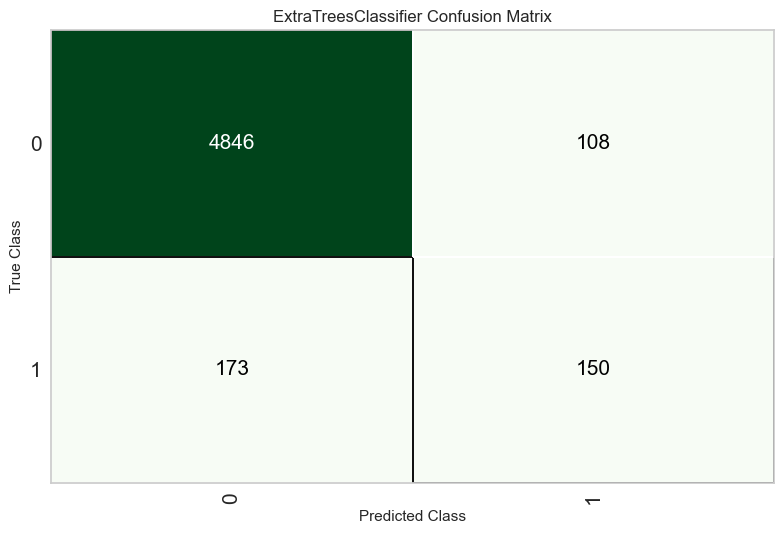

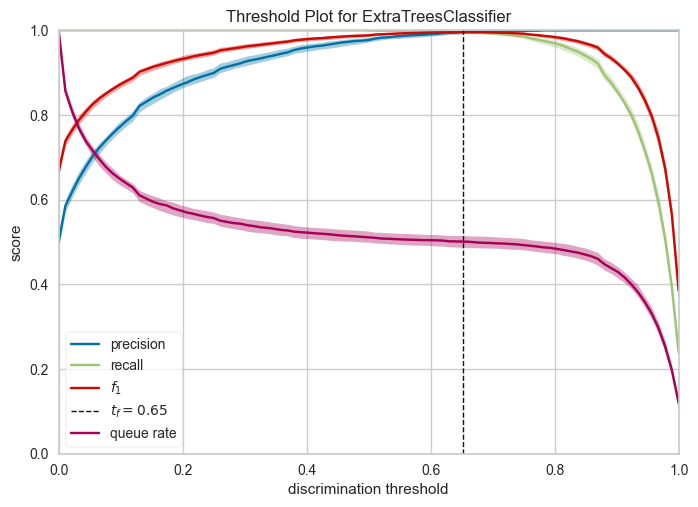

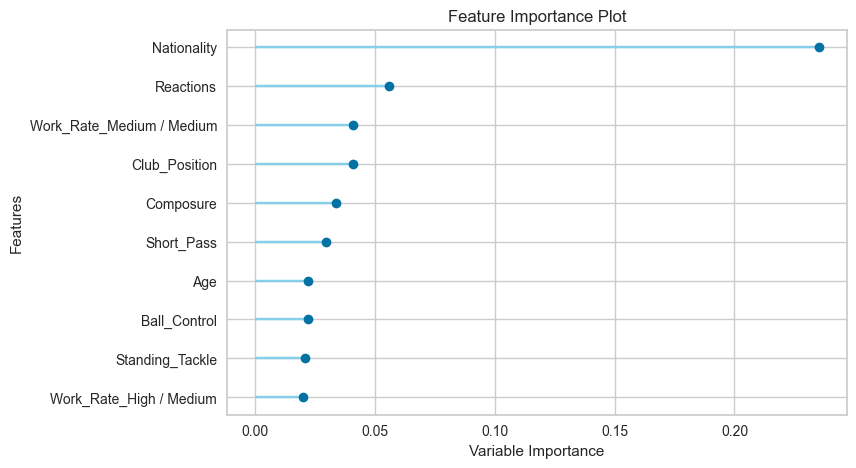

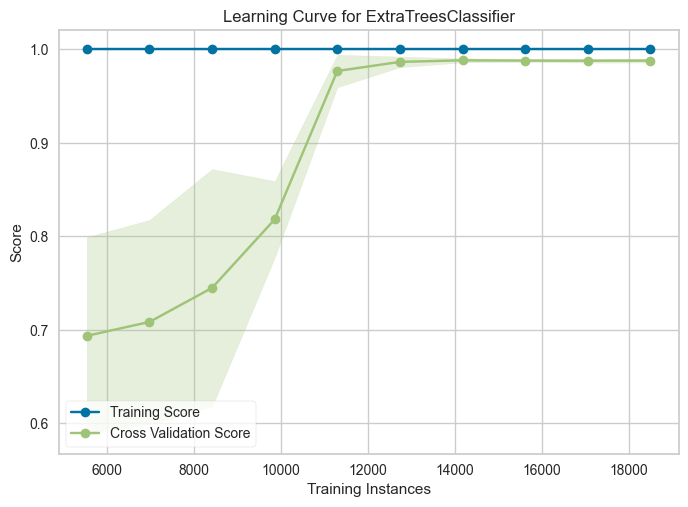

In [36]:
plot_model(best_model, plot='confusion_matrix')
plot_model(best_model, plot='threshold')
plot_model(best_model, plot='feature')
plot_model(best_model, plot='learning')

**3.1.2. Rta/**
- Decision tree (dt): Es método de aprendizaje supervisado no paramétrico y puede usarse tanto en tareas de clasificación como regresión. A través de reglas aprendidas según las características de los datos va tomando decisiones para separar de forma binaria los atributos y asi clasificar las nuevas observaciones. 

- Extra Trees (et): Es un método de emsamble que, a diferencia de arboles de decision clasicos, selecciona  de una forma mas extrema y aleatoria los atributos y umbrales con los cuales divide los nodos.
- Random Forest tree (rf): Es un método de ensamble que utiliza varios clasificadores de árboles de decisión tomando submuestras del conjunto de datos y utiliza el promedio para mejorar la precisión predictiva y controlar el sobreajuste. 





**3.1.3. Rta/** Tras realizar la comparación de modelos, el que mejor rendimiento tiene términos de precisión es Extra Trees (ET), y aunque LightGBM tardó menos. 
- El modelo, en su matriz de confusión (30% del total de obs), evidencia un bajo número de falsos positivos (108) a cambio de tener más falsos negativos (173), lo que hace que haya un sesgo hacia la precisión. 

- El gráfico de threshold indica que el valor por defecto (0.5) no es optimo, pues para reducir falsos positivos habría que aumentar ese umbral hasta 0.65 aproximadamente. 

- En cuanto a la importancia de variables se destaca Nationality, Reactions y Club_Position, junto con variables que representan aspectos técnicos de un futbolista (Ball_Control, Short_Pass). Esto tiene sentido con los intereses.  

- La curva de aprendizaje muestra estabilidad, aunque parece que al incio el modelo está sobreajustando (perfecto el entrenamiento). A medida que aumentan los datos, el modelo generaliza mucho mejor hasta cierto punto donde comeinza a estabilizarse. Esto significa que el modelo tiene alta capacidad y puede aprender bien con cerca de 14000 ejemplos.

### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

**3.2.1. Entrenamiento de XGBoost**

In [38]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (confusion_matrix, f1_score, roc_auc_score)

In [41]:
RANDOM_STATE = 42

def print_metrics(y_true, y_pred, y_prob=None, titulo="Métricas"):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    prec  = precision_score(y_true, y_pred, zero_division=0)
    rec   = recall_score(y_true, y_pred, zero_division=0)
    f1    = f1_score(y_true, y_pred, zero_division=0)
    auc   = roc_auc_score(y_true, y_prob) if y_prob is not None else np.nan
    print(f"\n=== {titulo} ===")
    print(f"TP={tp}  TN={tn}  FP={fp}  FN={fn}")
    print(f"Precision={prec:.3f}  Recall={rec:.3f}  F1={f1:.3f}  AUC={auc:.4f}")
    return {"TP":tp,"TN":tn,"FP":fp,"FN":fn,"Precision":prec,"Recall":rec,"F1":f1,"AUC":auc}

def compute_scale_pos_weight(y):
    pos = y.sum()
    neg = len(y) - pos
    return float(neg / pos) if pos > 0 else 1.0


In [56]:
df.columns

Index(['Nationality', 'Club_Position', 'Height', 'Weight', 'Preffered_Foot',
       'Age', 'Work_Rate', 'Weak_foot', 'Skill_Moves', 'Ball_Control',
       'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle',
       'Aggression', 'Reactions', 'Interceptions', 'Vision', 'Composure',
       'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed',
       'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 'Heading',
       'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy',
       'Penalties', 'Volleys', 'label'],
      dtype='object')

In [57]:
X = df.drop(columns=['label'])
y = df["label"]

num_cols = X.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

col_transformer = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=93, stratify=y)

# Ratio para desbalance
clase_0 = (y_train == 0).sum()
clase_1 = (y_train == 1).sum()
peso = clase_0 / clase_1 if clase_1 > 0 else 1.0


pipeline_xgboost = Pipeline(steps=[("prep", col_transformer),
                                   ("clf", XGBClassifier(eval_metric="logloss", random_state=93, scale_pos_weight=peso ))])

pipeline_xgboost.fit(X_train, y_train)
y_pred = pipeline_xgboost.predict(X_test)
len(y_pred)

5277

In [58]:
print("Matriz de confusión\n", confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Matriz de confusión
 [[4715  239]
 [ 113  210]] 

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      4954
           1       0.47      0.65      0.54       323

    accuracy                           0.93      5277
   macro avg       0.72      0.80      0.75      5277
weighted avg       0.95      0.93      0.94      5277



In [59]:
feat_names = pipeline_xgboost.named_steps["prep"].get_feature_names_out()

imp = pipeline_xgboost.named_steps["clf"].feature_importances_

# 3) ranking
fi = (pd.DataFrame({"feature_out": feat_names, "importance": imp})
        .sort_values("importance", ascending=False)
        .reset_index(drop=True))

fi.head(20)  # Top 20


,feature_out,importance
0,cat__Club_Position_Res,0.043257
1,cat__Nationality_Brazil,0.029025
2,num__Reactions,0.026752
3,cat__Nationality_Spain,0.026213
4,cat__Nationality_England,0.022103
5,cat__Club_Position_GK,0.021701
6,cat__Nationality_Italy,0.021661
7,cat__Nationality_Venezuela,0.021197
8,cat__Nationality_India,0.020572
9,cat__Nationality_Finland,0.019906


In [60]:
# === 0) Imports (los del HTML + métricas) ===
import numpy as np
import plotly.graph_objects as go
from sklearn.model_selection import cross_val_score



def plot_line_std(x, y, std):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Main Line'))
    fig.add_trace(go.Scatter(x=np.concatenate([x, x[::-1]]),
                             y=np.concatenate([y - std, (y + std)[::-1]]),
                             fill='toself',
                             fillcolor='rgba(0,100,80,0.2)',
                             line=dict(color='rgba(255,255,255,0)'),
                             name='Variation'))
    fig.update_layout(title='Precisión del modelo con el número de features',
                      template='simple_white',
                      showlegend=False,
                      xaxis_title='Número de features',
                      yaxis_title='Score')
    fig.show()

# === 2) Obtener matriz transformada de TRAIN (como en el HTML) ===
prep = pipeline_xgboost.named_steps["prep"]
clf  = pipeline_xgboost.named_steps["clf"]

Xtr_enc = prep.transform(X_train)
feat_out = prep.get_feature_names_out()
Xtr_enc = pd.DataFrame(Xtr_enc.toarray() if hasattr(Xtr_enc, "toarray") else Xtr_enc,
                       columns=feat_out)

# === 3) Ranking por IMPORTANCIA (gain) y mapeo a variable original ===
booster = clf.get_booster()
gain_dict = booster.get_score(importance_type="gain")       # claves: f0,f1,...
gain_vals = [gain_dict.get(f"f{i}", 0.0) for i in range(len(feat_out))]
fi = (pd.DataFrame({"feature_out": feat_out, "gain": gain_vals})
        .sort_values("gain", ascending=False)
        .reset_index(drop=True))

def to_original(col):
    # 'cat__Nationality_AR' -> 'Nationality' ; 'num__Age' -> 'Age'
    if col.startswith("cat__"):
        return col[len("cat__"):].split("_", 1)[0]
    if col.startswith("num__"):
        return col[len("num__"):]
    return col

fi["orig_feature"] = fi["feature_out"].map(to_original)
fi_group = (fi.groupby("orig_feature", as_index=False)["gain"]
              .sum()
              .sort_values("gain", ascending=False))

# Orden de variables ORIGINALES por importancia
orig_rank = fi_group["orig_feature"].tolist()
print("Top 10 variables originales por 'gain':")
display(fi_group.head(10))

# === 4) Eliminación progresiva (como el HTML),
#        pero añadiendo features según el ranking de importancia ===
def cols_for_topk(k):
    keep_orig = set(orig_rank[:k])                     # top-k variables originales
    keep_cols = [c for c in Xtr_enc.columns           # columnas codificadas (dummies)
                 if to_original(c) in keep_orig]
    return keep_cols

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

precision_scores = []
k_values = list(range(1, len(orig_rank) + 1))         # 1..#features_originales

for k in k_values:
    cols_k = cols_for_topk(k)
    # igual que en el HTML: usamos el CLF directamente sobre la matriz ya transformada
    scores = cross_val_score(
        clf, Xtr_enc[cols_k], y_train,
        cv=cv, scoring='precision_macro'
    )
    precision_scores.append(scores)

# Media y desviación para el gráfico
y_mean = np.array(precision_scores).mean(axis=1)
y_std  = np.array(precision_scores).std(axis=1)

plot_line_std(k_values, y_mean, y_std)

# === 5) Elegir el K óptimo y mostrar qué variables incluye ===
best_idx = int(np.argmax(y_mean))
best_k = k_values[best_idx]
print(f"K óptimo por CV (precision_macro): {best_k}  |  Score medio = {y_mean[best_idx]:.4f}")
print("Variables originales seleccionadas:")
print(orig_rank[:best_k])


Top 10 variables originales por 'gain':


,orig_feature,gain
20,Nationality,1873.231436
6,Club,353.965006
23,Reactions,75.016396
36,Work,61.497556
7,Composure,38.693745
1,Age,29.349611
30,Standing_Tackle,27.559099
10,Dribbling,19.530525
25,Shot_Power,19.357079
15,Interceptions,19.286348


K óptimo por CV (precision_macro): 27  |  Score medio = 0.7275
Variables originales seleccionadas:
['Nationality', 'Club', 'Reactions', 'Work', 'Composure', 'Age', 'Standing_Tackle', 'Dribbling', 'Shot_Power', 'Interceptions', 'Short_Pass', 'Stamina', 'Weight', 'Finishing', 'Heading', 'Acceleration', 'Ball_Control', 'Marking', 'Speed', 'Balance', 'Sliding_Tackle', 'Agility', 'Long_Shots', 'Freekick_Accuracy', 'Strength', 'Crossing', 'Aggression']


In [61]:
# 6) Construir TEST transformado y entrenar dos modelos: completo vs. reducido
Xte_enc = prep.transform(X_test)
Xte_enc = pd.DataFrame(Xte_enc.toarray() if hasattr(Xte_enc, "toarray") else Xte_enc,
                       columns=feat_out)

cols_best = cols_for_topk(best_k)

# Modelo COMPLETO
clf_full = clf.__class__(**clf.get_params())
clf_full.fit(Xtr_enc, y_train)
yhat_full = clf_full.predict(Xte_enc)
print("\n=== Modelo COMPLETO ===")
print(confusion_matrix(y_test, yhat_full))
print(classification_report(y_test, yhat_full, zero_division=0))

# Modelo REDUCIDO (TOP-K)
clf_red = clf.__class__(**clf.get_params())
clf_red.fit(Xtr_enc[cols_best], y_train)
yhat_red = clf_red.predict(Xte_enc[cols_best])
print(f"\n=== Modelo REDUCIDO (TOP-{best_k}) ===")
print(confusion_matrix(y_test, yhat_red))
print(classification_report(y_test, yhat_red, zero_division=0))



=== Modelo COMPLETO ===
[[4715  239]
 [ 113  210]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      4954
           1       0.47      0.65      0.54       323

    accuracy                           0.93      5277
   macro avg       0.72      0.80      0.75      5277
weighted avg       0.95      0.93      0.94      5277


=== Modelo REDUCIDO (TOP-27) ===
[[4716  238]
 [ 101  222]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      4954
           1       0.48      0.69      0.57       323

    accuracy                           0.94      5277
   macro avg       0.73      0.82      0.77      5277
weighted avg       0.95      0.94      0.94      5277



El TOP-27 logra un punto medio: desempeño igual o mejor que el modelo completo, con menor complejidad y mejor interpretabilidad. Agregar más features después de ~30 aporta mejoras marginales, por lo que no se justifican.

  a) ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? Sí, el modelo con 27 variables es un poco mejor que el completo: sube F1/Recall y no baja la Precision. La variación en CV es pequeña, por lo que sigue siendo un modelo robusto.
  
  b) ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización.
  - Simplicidad: menos columnas significa un pipeline más limpio y menos propenso a ruido.
  - Eficiencia: se entrena y predice más rápido y con menos uso de memoria.
  - Generalización: quitar variables poco útiles reduce la varianza y el sobreajuste.
  - Mantenimiento: menos dependencias de los datos.

  c) Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. 
  Sí. Con 27 variables es más fácil explicar por qué decide el modelo, pues se puede centrar en las pocas variables dominantes (Nationality/Club/skills técnicas). Además, los gráficos de importancia son más claros.

### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

In [63]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt

# 1) Probabilidades sin calibrar (modelo reducido)
y_proba_uncal = clf_red.predict_proba(Xte_enc[cols_best])[:, 1]
brier_uncal = brier_score_loss(y_test, y_proba_uncal)

# 2) Calibración con Isotonic Regression sobre el modelo reducido
calibrated_clf = CalibratedClassifierCV(
    estimator=clf_red, method="isotonic", cv=5
)
calibrated_clf.fit(Xtr_enc[cols_best], y_train)

y_proba_cal = calibrated_clf.predict_proba(Xte_enc[cols_best])[:, 1]
brier_cal = brier_score_loss(y_test, y_proba_cal)

print("1. Brier Score sin calibrar:", round(brier_uncal, 4))
print("2. Brier Score calibrado:", round(brier_cal, 4))


1. Brier Score sin calibrar: 0.0476
2. Brier Score calibrado: 0.0355


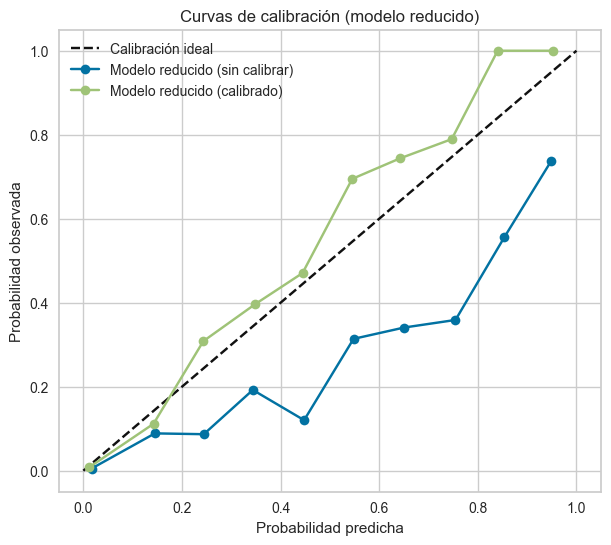

In [64]:
# Curvas de calibración
prob_true_uncal, prob_pred_uncal = calibration_curve(y_test, y_proba_uncal, n_bins=10)
prob_true_cal, prob_pred_cal = calibration_curve(y_test, y_proba_cal, n_bins=10)

plt.figure(figsize=(7,6))
plt.plot([0,1], [0,1], "k--", label="Calibración ideal")
plt.plot(prob_pred_uncal, prob_true_uncal, "o-", label="Modelo reducido (sin calibrar)")
plt.plot(prob_pred_cal, prob_true_cal, "o-", label="Modelo reducido (calibrado)")
plt.xlabel("Probabilidad predicha")
plt.ylabel("Probabilidad observada")
plt.title("Curvas de calibración (modelo reducido)")
plt.legend()
plt.show()


La calibración con Isotonic Regression mejoró bastante el ajuste probabilístico del modelo reducido. Esto se ve tanto con el valor reducido en el Brier Score  como en la curva calibrada que se acerca a la diagonal principal (ideal). Esto demuestra que la calibración aporta modularidad y genera mejor confianza para interpretar probabilidades.

Mucho éxito!

<center>
<img src="https://i.pinimg.com/originals/55/3d/42/553d42bea9b10e0662a05aa8726fc7f4.gif" width=300>